In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.patches as mpatches
import matplotlib.colors as mcolors

import os

%matplotlib inline

In [3]:
sns.set_style("whitegrid")

In [4]:
from visualize._utils import *

In [5]:
iclr_path = '/home/lrvnc/Projects/worm-graph/logs/results/ICLR'

# Color and Marker code

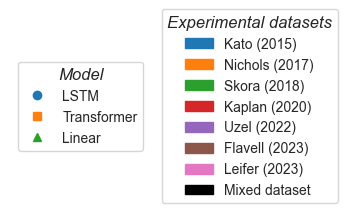

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D
from matplotlib.patches import Patch

# Provided marker and dataset info
markers = {
    "o": "LSTM",
    "s": "Transformer",
    "^": "Linear",
}

marker_colors = sns.color_palette('tab10', n_colors=len(markers))

# Create custom markers for models
marker_legend = [Line2D([0], [0], marker=m, color=marker_colors[i], label=l, linestyle='None') for i, (m, l) in enumerate(markers.items())]

# Plot the marker legends
fig, axs = plt.subplots(1, 2, figsize=(4, 1))

# Plot marker legend on the left subplot
axs[0].legend(handles=marker_legend, loc='center', title='Model')
# Legend title italic
axs[0].get_legend().get_title().set_fontsize('large')
axs[0].get_legend().get_title().set_fontstyle('italic')
axs[0].axis('off')

color_palette = sns.color_palette("tab10", n_colors=7)
# Add black color to the end of color palette
color_palette.append((0, 0, 0))
datasets = ["Kato", "Nichols", "Skora", "Kaplan", "Uzel", "Flavell", "Leifer", "Mixed"]

dataset_labels = ["Kato (2015)", "Nichols (2017)", "Skora (2018)", "Kaplan (2020)", "Uzel (2022)", "Flavell (2023)", "Leifer (2023)", "Mixed dataset"]
original_dataset_names = ["Kato2015", "Nichols2017", "Skora2018", "Kaplan2020", "Uzel2022", "Flavell2023", "Leifer2023"]

# Create rectangular color patches for datasets
color_legend = [Patch(facecolor=c, edgecolor=c, label=l) for c, d, l in zip(color_palette, datasets, dataset_labels)]

# Plot color legend on the right subplot
axs[1].legend(handles=color_legend, loc='center', title='Experimental datasets')
axs[1].get_legend().get_title().set_fontsize('large')
axs[1].get_legend().get_title().set_fontstyle('italic')
axs[1].axis('off')

ds_color_code = {dataset: color for dataset, color in zip(datasets, color_palette)}
original_ds_color_code = {dataset: color for dataset, color in zip(original_dataset_names, color_palette)}
model_marker_code = {model: marker for model, marker in zip(markers.values(), markers.keys())}
model_color_code = {model: color for model, color in zip(markers.values(), marker_colors)}

plt.show()

# Figure 1

In [7]:
train_dataset_url = '/home/lrvnc/Projects/worm-graph/logs/results/ICLR/NTS_LINEAR/exp5/dataset/train_dataset_info.csv'
val_dataset_url = '/home/lrvnc/Projects/worm-graph/logs/results/ICLR/NTS_LINEAR/exp5/dataset/val_dataset_info.csv'

analysis_url ='/home/lrvnc/Projects/worm-graph/logs/results/ICLR/CROSS_DS_LINEAR/exp0/analysis/validation_loss_per_dataset.csv' # Amount of worms per dataset

train_dataset_info = pd.read_csv(train_dataset_url)
val_dataset_info = pd.read_csv(val_dataset_url)
worms_info = pd.read_csv(analysis_url)

train_dataset_info['total_time_steps'] = train_dataset_info['train_time_steps'] + val_dataset_info['val_time_steps']

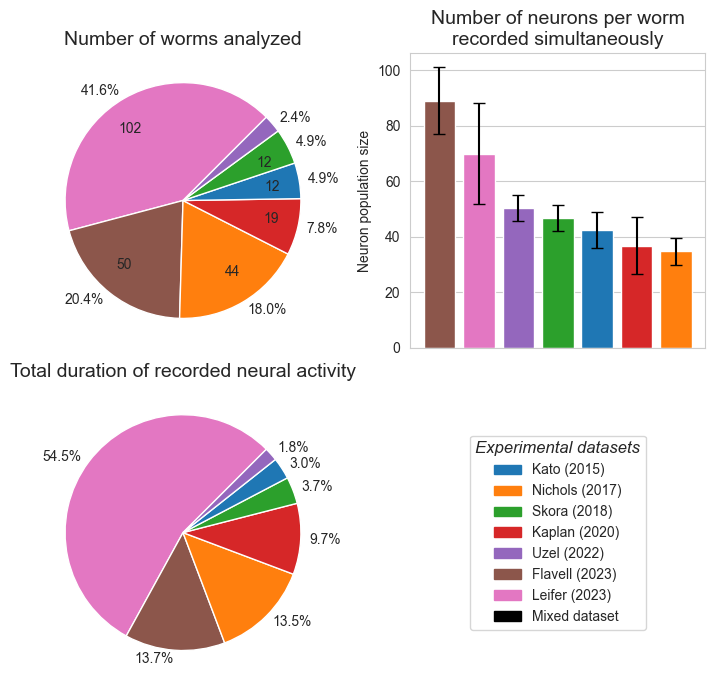

In [8]:
amount_of_data_disttribution = train_dataset_info[['dataset', 'total_time_steps']].groupby('dataset').sum().sort_values(by='total_time_steps', ascending=False)
amount_of_data_disttribution['percentage'] = amount_of_data_disttribution['total_time_steps'] / amount_of_data_disttribution['total_time_steps'].sum()
worms_info['percentage'] = worms_info['num_worms'] / worms_info['num_worms'].sum()
worms_info = worms_info.sort_values(by='percentage', ascending=False)
worm_label = worms_info['num_worms'][:6].tolist()+['']

# ============================== #
# Pizza plot of the amount of data distribution
fig, ax = plt.subplots(2, 2, figsize=(7, 7))

# Display percentage inside pie plot
ax[1,0].pie(amount_of_data_disttribution['total_time_steps'], labels=[f"{percentage:.1%}" for percentage in amount_of_data_disttribution['percentage']], labeldistance=1.075, startangle=45, colors=[ds_color_code[dataset[:-4]] for dataset in amount_of_data_disttribution.index])
# Equal aspect ratio ensures that pie is drawn as a circle
# Add title
ax[1,0].set_title('Total duration of recorded neural activity', fontsize=14)

# ============================== #

neuron_pop_distribution = train_dataset_info[['dataset', 'num_neurons']].groupby('dataset').mean().sort_values(by='num_neurons', ascending=False)
neuron_pop_distribution['std'] = train_dataset_info[['dataset', 'num_neurons']].groupby('dataset').std().sort_values(by='num_neurons', ascending=False)


# Plot barplot
ax[0,1].bar(neuron_pop_distribution.index, neuron_pop_distribution['num_neurons'], yerr=neuron_pop_distribution['std'], color=[ds_color_code[dataset[:-4]] for dataset in neuron_pop_distribution.index])

# Add caps to error bars and reduce their thickness
ax[0,1].errorbar(neuron_pop_distribution.index, neuron_pop_distribution['num_neurons'], yerr=neuron_pop_distribution['std'], fmt='none', capsize=4, color='black', elinewidth=0.2)

ax[0,1].set_title('Number of neurons per worm\nrecorded simultaneously', fontsize=14)

ax[0,1].set_ylabel('Neuron population size')

# Delete xticks
ax[0,1].set_xticks([])

# ============================== #

# Plot color legend on the right subplot
ax[1,1].legend(handles=color_legend, loc='center', title='Experimental datasets')
ax[1,1].set_xticks([])
ax[1,1].set_yticks([])
ax[1,1].set_ylabel('')
ax[1,1].get_legend().get_title().set_fontsize('large')
ax[1,1].get_legend().get_title().set_fontstyle('italic')
ax[1,1].axis('off')

# ============================== #

ax[0,0].pie(worms_info['num_worms'], labels=[f"{percentage:.1%}" for percentage in worms_info['percentage']], labeldistance=1.075, startangle=45, colors=[ds_color_code[dataset[:-4]] for dataset in worms_info['dataset']])
ax[0,0].pie(worms_info['num_worms'], labels=[f"{n}" for n in worm_label], labeldistance=0.70, startangle=45, colors=[ds_color_code[dataset[:-4]] for dataset in worms_info['dataset']])
ax[0,0].set_title('Number of worms analyzed', fontsize=14)

# ============================== #

plt.tight_layout()

plt.show()

# Figure 2

In [9]:
nts_lstm_path = os.path.join(iclr_path, 'NTS_LSTM')
nts_transformer_path = os.path.join(iclr_path, 'NTS_TRANSFORMER')
nts_linear_path = os.path.join(iclr_path, 'NTS_LINEAR')

hidden_lstm_path = os.path.join(iclr_path, 'HIDDEN_LSTM')
hidden_transformer_path = os.path.join(iclr_path, 'HIDDEN_TRANSFORMER')
hidden_linear_path = os.path.join(iclr_path, 'HIDDEN_LINEAR')

## General Scaling Law

/home/lrvnc/Projects/worm-graph/visualize/_utils.py:1019: UserWarning: The figure layout has changed to tight
  else:
/home/lrvnc/Projects/worm-graph/visualize/_utils.py:1019: UserWarning: The figure layout has changed to tight
  else:


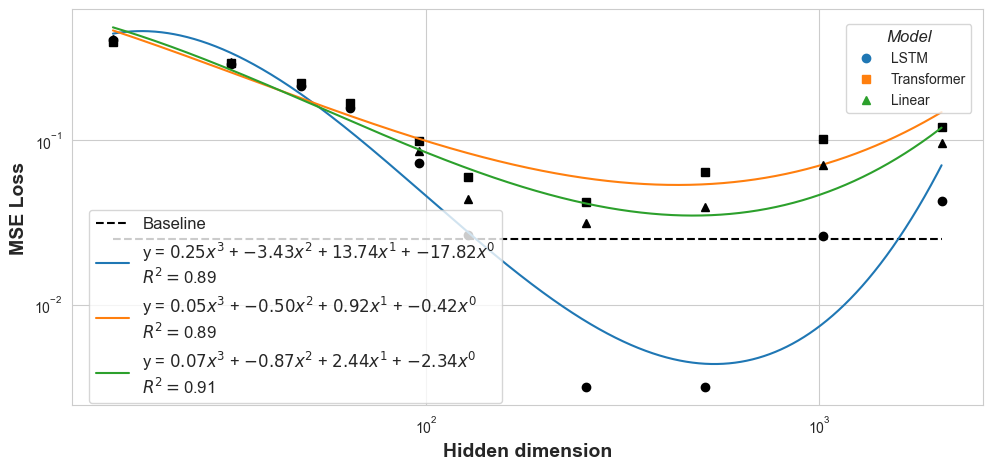

In [40]:
hidden_path = [hidden_lstm_path, hidden_transformer_path, hidden_linear_path]
gen_sl_path = [nts_lstm_path, nts_transformer_path, nts_linear_path]
models = ['LSTM', 'Transformer', 'Linear']

fig, ax = plt.subplots(1, 1, figsize=(10, 5))

for i, (path, model) in enumerate(zip(hidden_path, models)):
    fig, ax = plot_scaling_law(exp_log_dir=path, exp_name='hidden_size', exp_plot_dir=None, fig=fig, ax=ax, fit_deg=3)
    # Delete title
    ax.set_title('')
    ax.set_xlabel('Hidden dimension')
    ax.set_ylabel('MSE Loss')
    # Add experimental points legend
    ax.lines[-3].set_marker(model_marker_code[model])
    ax.lines[-3].set_color(ds_color_code['Mixed'])
    ax.lines[-1].set_color(model_color_code[model])
    ax.lines[-2].set_marker('')

    if i != 0:
        # Delete baseline
        ax.lines[-2].remove()

# Increase x and y label fontsize
ax.xaxis.label.set_size(14)
ax.yaxis.label.set_size(14)

# Bold x and y labels
ax.xaxis.label.set_weight('bold')
ax.yaxis.label.set_weight('bold')

# Handles and labels for first legend
handles, labels = ax.get_legend_handles_labels()

# Create the first legend
legend1 = ax.legend(handles=marker_legend, loc='center right', bbox_to_anchor=(0.995, 0.85), title='Model')
ax.get_legend().get_title().set_fontstyle('italic')
ax.get_legend().get_title().set_fontsize('large')
ax.add_artist(legend1)

ax.legend(handles, labels, loc='center left', bbox_to_anchor=(0.01, 0.25), fontsize=12)

plt.show()


## Evaluation on different datasets

In [52]:
losses = []

loss_df = pd.DataFrame(columns=['model', 'dataset', 'val_loss', 'val_baseline', 'exp_param'])

for i, (path, model) in enumerate(zip(gen_sl_path, models)):

    # Loop through all experiments
    for file in np.sort(os.listdir(path)):

        # Skip if not starts with exp
        if not file.startswith('exp') or file.startswith('exp_'):
            continue

        # Get experiment directory
        exp_dir = os.path.join(path, file)

        # Experiment parameters
        exp_param, exp_title, exp_xaxis = experiment_parameter(exp_dir, key='num_time_steps')

        # Load validation losses per dataset
        tmp_df = pd.read_csv(os.path.join(exp_dir, 'analysis', 'validation_loss_per_dataset.csv'))

        # Add experiment parameter to dataframe
        tmp_df['exp_param'] = exp_param

        # Load train information
        train_info = pd.read_csv(os.path.join(exp_dir, 'dataset', 'train_dataset_info.csv'))

        # Dataset names used for training
        train_dataset_names = train_info['dataset'].unique()
        tmp_df['train_dataset_names'] = ', '.join(train_dataset_names)

        # Add model name to dataframe
        tmp_df['model'] = model

        # Add experiment to dataframe
        tmp_df['exp'] = file
        
        # Append to dataframe
        loss_df = pd.concat([loss_df, tmp_df], axis=0)


    # Make exp_param multi index with dataset
    loss_df = loss_df.set_index(['exp_param', 'dataset'])

    # Drop NaNs
    loss_df = loss_df.dropna()

    losses.append(loss_df)

    loss_df = pd.DataFrame(columns=['dataset', 'val_loss', 'val_baseline', 'exp_param'])

In [271]:
model_marker_code

{'LSTM': 'o', 'Transformer': 's', 'Linear': '^'}

/tmp/ipykernel_8050/3117561974.py:58: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  slDF = slDF.append({'model': model, 'dataset': dataset, 'slope': slope,
/tmp/ipykernel_8050/3117561974.py:58: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  slDF = slDF.append({'model': model, 'dataset': dataset, 'slope': slope,
/tmp/ipykernel_8050/3117561974.py:58: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  slDF = slDF.append({'model': model, 'dataset': dataset, 'slope': slope,
/tmp/ipykernel_8050/3117561974.py:58: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  slDF = slDF.append({'model': model, 'dataset': dataset, 'slope': slope,
/tmp/ipykernel_8050/

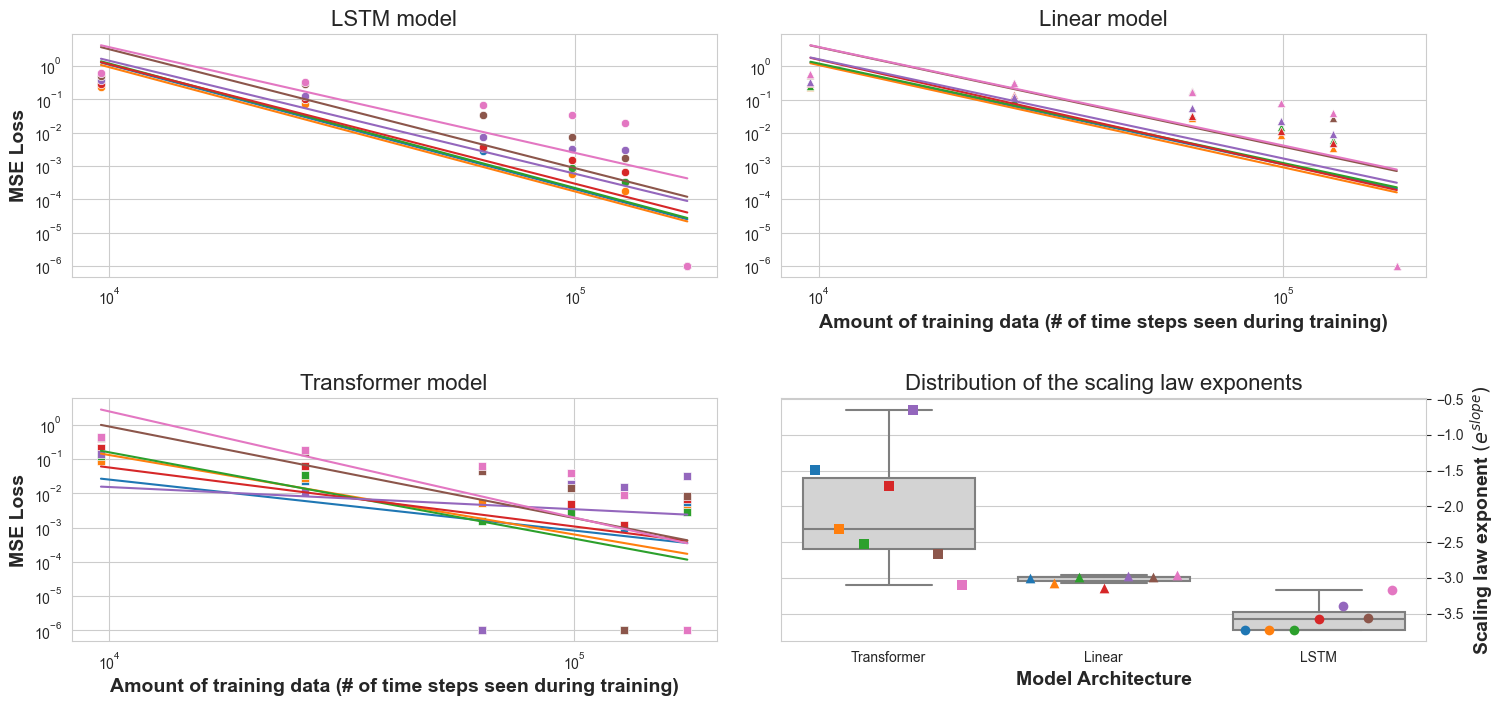

In [292]:
fig, ax = plt.subplots(2, 2, figsize=(15, 7))

# Scaling law df
slDF = pd.DataFrame(columns=['model', 'dataset', 'slope', 'intercept', 'r_value', 'num_worms_val_dataset'])

# Create an empty list to hold custom legend patches
legend_patches = []

for subplot_idx, loss_df in enumerate(losses):

    if subplot_idx > 1:
        col = 1
    else:
        col = 0
    
    row = subplot_idx % 2

    if row == 1 and col == 1:
        continue

    # Plot validation loss vs. exp_param for all datasets
    for color_idx, dataset in enumerate(['Kato2015', 'Nichols2017', 'Skora2018', 'Kaplan2020', 'Uzel2022', 'Flavell2023', 'Leifer2023']):
        df_subset_model = loss_df.loc[loss_df.index.get_level_values('dataset') == dataset, ['val_loss', 'val_baseline', 'model']].reset_index()
        df_subset_model['reduced_loss'] = df_subset_model['val_loss'] - df_subset_model['val_baseline']
        df_subset_model['reduced_loss'] = df_subset_model['reduced_loss'] - df_subset_model['reduced_loss'].min() + 1e-6

        color = ds_color_code[dataset[:-4]]
        model = df_subset_model['model'].values[0]

        # Append patches for legend
        legend_patches.append(mpatches.Patch(color=color, label=f'{dataset[:-4]}'))
        
        sns.scatterplot(data=df_subset_model, x='exp_param', y='reduced_loss', ax=ax[row,col], color=color, marker=model_marker_code[model])
        #sns.lineplot(data=df_subset_model, x='exp_param', y='val_baseline', ax=ax[row,col], linestyle='--', color=color)

        # Annotate number of val. worms
        num_worms = loss_df.loc[loss_df.index.get_level_values('dataset') == dataset, 'num_worms'].values[0]
        #min_exp_param = df_subset_baseline['exp_param'].min()
        #max_val_baseline = df_subset_baseline['val_baseline'].max()
        #ax.annotate(r'$n_{val}=$'+f'{int(num_worms)}', (min_exp_param, max_val_baseline), textcoords="offset points", xytext=(0,2), ha='center', fontsize=8, color=color)

        # Log-log scale
        ax[row,col].set_xscale('log')
        ax[row,col].set_yscale('log')

        # Try to fit linear regression (log-log)
        try:
            x = np.log(df_subset_model['exp_param'].values)
            y = np.log(df_subset_model['reduced_loss'].values)
            slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
            fit_label = 'y = {:.2e}x + {:.2e} ('.format(slope, intercept)+r'$R^2=$'+'{})'.format(round(r_value**2, 3))
            ax[row,col].plot(df_subset_model['exp_param'].values, np.exp(intercept + slope * x), linestyle='-', color=color)
        except:
            logger.info('Failed to fit linear regression (log-log scale) for dataset {}'.format(dataset))
            pass

        # Append to scaling law dataframe
        slDF = slDF.append({'model': model, 'dataset': dataset, 'slope': slope,
                            'intercept': intercept, 'r_value': r_value, 'num_worms_val_dataset': num_worms}, ignore_index=True)

    # Adding the patches to the legend
    #legend1 = ax[subplot_idx].legend(loc='center right', fontsize='small', bbox_to_anchor=(1.29, 0.5))
    #ax[subplot_idx].add_artist(legend1)

    # Floating legend box for dataset colors
    #legend2 = ax.legend(handles=legend_patches, loc='center right', title="Datasets", fontsize='medium', bbox_to_anchor=(1.12, 0.5))
    #ax.add_artist(legend2)

    # Delete xlabel and ylabel
    ax[row,col].set_xlabel('')
    ax[row,col].set_ylabel('')

    # Set title
    ax[row,col].set_title('{} model'.format(model), fontdict={'fontsize': 16})

# Set axis labels and title
ax[1,0].set_xlabel('Amount of training data (# of time steps seen during training)', fontdict={'fontsize': 14, 'fontweight':'bold'})
ax[0,1].set_xlabel('Amount of training data (# of time steps seen during training)', fontdict={'fontsize': 14, 'fontweight':'bold'})
ax[0,0].set_ylabel('MSE Loss', fontdict={'fontsize': 14, 'fontweight':'bold'})
ax[1,0].set_ylabel('MSE Loss', fontdict={'fontsize': 14, 'fontweight':'bold'})
#ax[0,1].legend(handles=color_legend, loc='upper right', title='Validation datasets')


# Use seaborn's boxplot function with model on the x-axis
sns.boxplot(data=slDF, x='model', y='slope', ax=ax[1,1], color='lightgrey', showfliers=False,
            order=['Transformer', 'Linear', 'LSTM'])  # You might want to set a neutral color for the boxplot

for model, marker in model_marker_code.items():
    model_data = slDF[slDF['model'] == model]
    sns.stripplot(data=model_data, x='model', y='slope', hue='dataset', palette=original_ds_color_code, size=7, ax=ax[1,1],
                  order=['Transformer', 'Linear', 'LSTM'], dodge=True, marker=marker)

ax[1,1].set_title('Distribution of the scaling law exponents', fontsize=16)
ax[1,1].set_ylabel(r'Scaling law exponent $(e^{slope})$', fontsize=14, fontweight='bold')
ax[1,1].set_xlabel('Model Architecture', fontsize=14, fontweight='bold')

# Remove the automatic legend
ax[1,1].get_legend().remove()

# Get the legend object and set the legend labels with the dataset_labels list
#leg = ax[1,1].legend(title='Validation dataset', loc='upper right')
#for dataset_label, text in zip(dataset_labels, leg.get_texts()):
#    text.set_text(dataset_label)

# Place the y-axis label on the right side
ax[1,1].yaxis.set_label_position("right")
ax[1,1].yaxis.tick_right()

#ax.legend(title='Validation dataset', loc='upper right')

# Legend title in italic
#ax[1,1].get_legend().get_title().set_fontsize('large')
#ax[1,1].get_legend().get_title().set_fontstyle('italic')

plt.tight_layout(pad=0.5)

# Increase space between subplots
plt.subplots_adjust(wspace=0.1, hspace=0.5)

plt.show()

In [235]:
slDF['abs_slope'] = np.abs(slDF['slope'])

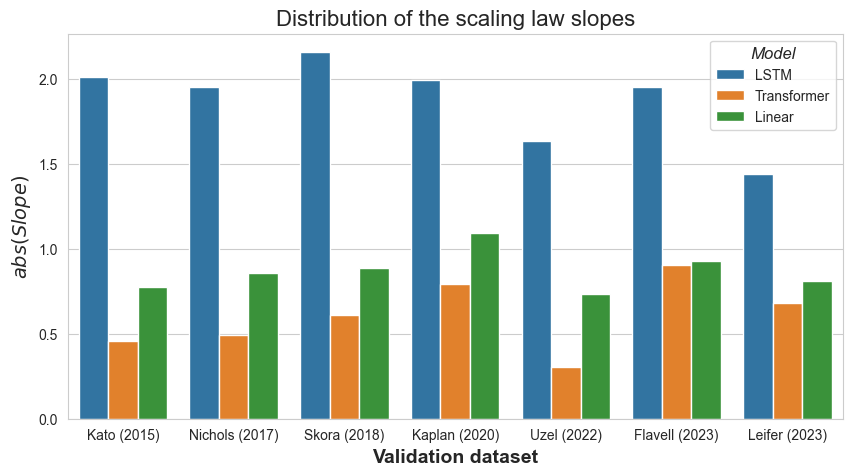

In [236]:
# Plot slope distribution by dataset, using the absolute value of the slope and the model as hue
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
sns.barplot(data=slDF, x='dataset', y='abs_slope', hue='model', ax=ax, palette=marker_colors)
ax.set_title('Distribution of the scaling law slopes', fontsize=16)
ax.set_ylabel(r'$abs(Slope)$', fontsize=14, fontweight='bold')
ax.set_xlabel('Validation dataset', fontsize=14, fontweight='bold')
ax.legend(title='Model', loc='upper right')
# Legend title in italic
ax.get_legend().get_title().set_fontsize('large')
ax.get_legend().get_title().set_fontstyle('italic')
# Set xticks to dataset_labels
ax.set_xticklabels(dataset_labels[:-1])
plt.show()

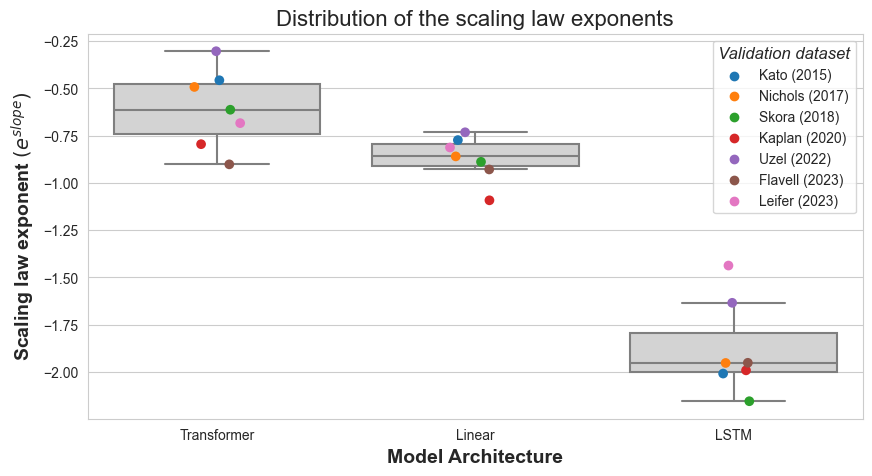

In [237]:
# Plot slope distribution by model, using the absolute value of the slope and the dataset as hue
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

# Use seaborn's boxplot function with model on the x-axis
sns.boxplot(data=slDF, x='model', y='slope', ax=ax, color='lightgrey', showfliers=False,
            order=['Transformer', 'Linear', 'LSTM'])  # You might want to set a neutral color for the boxplot

# Overplotting with a stripplot to show individual data points colored by their dataset
sns.stripplot(data=slDF, x='model', y='slope', hue='dataset', palette=original_ds_color_code, size=7, ax=ax,
              order=['Transformer', 'Linear', 'LSTM'], jitter=0.1)

ax.set_title('Distribution of the scaling law exponents', fontsize=16)
ax.set_ylabel(r'Scaling law exponent $(e^{slope})$', fontsize=14, fontweight='bold')
ax.set_xlabel('Model Architecture', fontsize=14, fontweight='bold')

# Get the legend object and set the legend labels with the dataset_labels list
leg = ax.legend(title='Validation dataset', loc='upper right')
for dataset_label, text in zip(dataset_labels, leg.get_texts()):
    text.set_text(dataset_label)

#ax.legend(title='Validation dataset', loc='upper right')

# Legend title in italic
ax.get_legend().get_title().set_fontsize('large')
ax.get_legend().get_title().set_fontstyle('italic')

plt.show()

## Predictions

In [84]:
exp_log_dir = nts_lstm_path

prediction_gap = {
    'exp': [],
    'dataset': [],
    'gap_mean': [],
    'gap_var': [],
    'num_time_steps': [],
}

for exp_dir in np.sort(os.listdir(exp_log_dir)):
    
    # Skip if not starts with exp
    if not exp_dir.startswith('exp') or exp_dir.startswith('exp_'):
        continue

    for exp_ds in np.sort(os.listdir(os.path.join(exp_log_dir, exp_dir, 'prediction', 'val'))):
        predictions_url = os.path.join(exp_log_dir, exp_dir, 'prediction', 'val', exp_ds, 'worm1', 'predictions.csv')
        named_neurons_url = os.path.join(exp_log_dir, exp_dir, 'prediction', 'val', exp_ds, 'worm1', 'named_neurons.csv')

        # Read csv files
        predictions = pd.read_csv(predictions_url)
        named_neurons = pd.read_csv(named_neurons_url)
        neurons = named_neurons['named_neurons']

        context_data = predictions[predictions['Type'] == 'Context'].drop(columns=['Type', 'Unnamed: 1'])
        context_data = context_data[neurons]  # Filter only named neurons

        ar_gen_data = predictions[predictions['Type'] == 'AR Generation'].drop(columns=['Type', 'Unnamed: 1'])
        ar_gen_data = ar_gen_data[neurons]  # Filter only named neurons

        ground_truth_data = predictions[predictions['Type'] == 'Ground Truth'].drop(columns=['Type', 'Unnamed: 1'])
        ground_truth_data = ground_truth_data[neurons]  # Filter only named neurons

        gt_gen_data = predictions[predictions['Type'] == 'GT Generation'].drop(columns=['Type', 'Unnamed: 1'])
        gt_gen_data = gt_gen_data[neurons]  # Filter only named neurons

        # Compute gap between GT Generation and Ground Truth in the first time step, for all neurons
        gap = np.abs(gt_gen_data.iloc[0, :] - ground_truth_data.iloc[0, :])

        # Retrieve amount of data
        num_time_steps, _, _ = experiment_parameter(os.path.join(exp_log_dir, exp_dir), key='num_time_steps')

        # Save gap statistics
        prediction_gap['exp'].append(exp_dir)
        prediction_gap['dataset'].append(exp_ds)
        prediction_gap['gap_mean'].append(gap.mean())
        prediction_gap['gap_var'].append(gap.var())
        prediction_gap['num_time_steps'].append(num_time_steps)
        
prediction_gap = pd.DataFrame(prediction_gap)

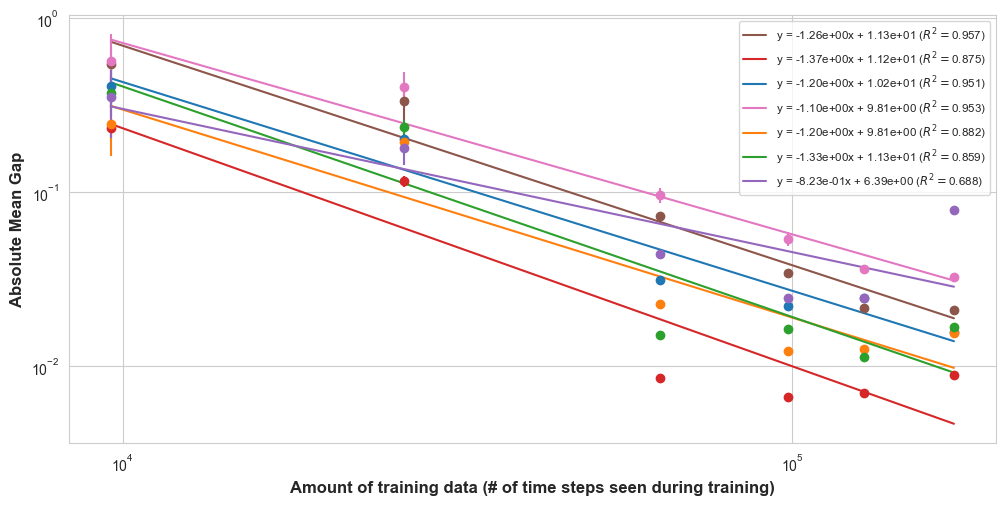

In [85]:
# Plot gap mean with bar errors vs. num_time_steps for all datasets
fig, ax = plt.subplots(figsize=(10, 5))

dataset_names = prediction_gap['dataset'].unique()

for ds_name in np.sort(dataset_names):
    df_subset = prediction_gap[prediction_gap['dataset'] == ds_name]
    # Plot mean gap with var as yerr, use the color code as in the previous plot
    ax.errorbar(df_subset['num_time_steps'], df_subset['gap_mean'], yerr=df_subset['gap_var'], color=ds_color_code[ds_name[:-4]], marker=model_marker_code['LSTM'], linestyle='')

    # Try to fit linear regression (log-log)
    try:
        x = np.log(df_subset['num_time_steps'].values)
        y = np.log(df_subset['gap_mean'].values)
        slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
        fit_label = 'y = {:.2e}x + {:.2e} ('.format(slope, intercept)+r'$R^2=$'+'{})'.format(round(r_value**2, 3))
        ax.plot(df_subset['num_time_steps'].values, np.exp(intercept + slope * x), color=ds_color_code[ds_name[:-4]], linestyle='-', label=fit_label)
    except:
        pass

# Set axis labels and title
ax.set_xlabel('Amount of training data (# of time steps seen during training)', fontdict={'fontsize': 12, 'fontweight':'bold'})
ax.set_ylabel("Absolute Mean Gap", fontdict={'fontsize': 12, 'fontweight':'bold'})

# Log-log scale
ax.set_xscale('log')
ax.set_yscale('log')

ax.legend(loc='upper right', fontsize='small')

plt.tight_layout(pad=0.5)
plt.show()

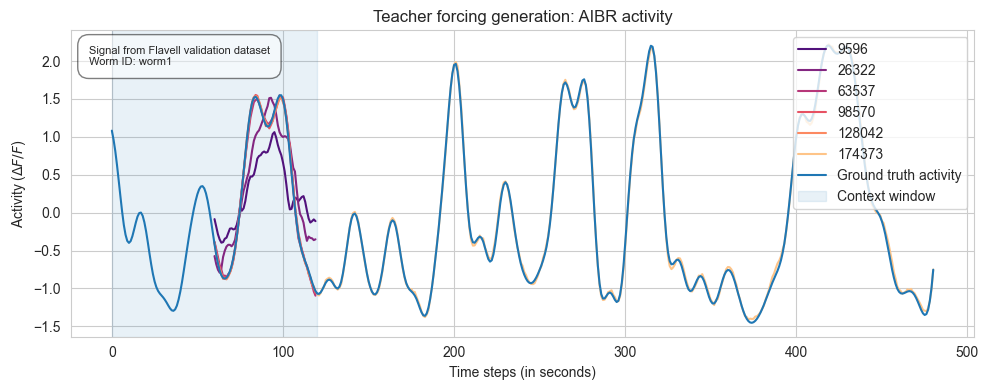

In [86]:
log_dir = nts_lstm_path
worms_to_plot = ['worm1']
neurons_to_plot = ['AIBR']
datasets_to_plot = ['Flavell2023']

fig, ax = plt.subplots(figsize=(10, 4))

for expID, exp_dir in enumerate(np.sort(os.listdir(log_dir))):

    # Skip if not starts with exp
    if not exp_dir.startswith('exp') or exp_dir.startswith('exp_'):
        continue

    exp_log_dir = os.path.join(log_dir, exp_dir)

    for type_ds in ['val']:

        for ds_name in os.listdir(os.path.join(exp_log_dir, 'prediction', type_ds)):

            for wormID in os.listdir(os.path.join(exp_log_dir, 'prediction', type_ds, ds_name)):

                # Skip if num_worms given
                if worms_to_plot is not None: 
                    if wormID not in worms_to_plot:
                        continue

                # Skip if dataset given
                if datasets_to_plot is not None:
                    if ds_name not in datasets_to_plot:
                        continue

                url = os.path.join(exp_log_dir, 'prediction', type_ds, ds_name, wormID, 'predictions.csv')
                neurons_url = os.path.join(exp_log_dir, 'prediction', type_ds, ds_name, wormID, 'named_neurons.csv')

                # Acess the prediction directory
                df = pd.read_csv(url)
                df.set_index(['Type', 'Unnamed: 1'], inplace=True)
                df.index.names = ['Type', '']

                # Get the named neurons
                neurons_df = pd.read_csv(neurons_url)
                neurons = neurons_df['named_neurons'].tolist()

                # Treat neurons_to_plot
                if isinstance(neurons_to_plot, int):
                    neurons = np.random.choice(neurons, size=min(neurons_to_plot, len(neurons)), replace=False).tolist()
                elif isinstance(neurons_to_plot, list):
                    # Skip neurons that are not available
                    neurons = [neuron for neuron in neurons_to_plot if neuron in neurons]

                seq_len = len(pd.concat([df.loc['Context'], df.loc['Ground Truth']], axis=0))
                max_time_steps = len(pd.concat([df.loc['Context'], df.loc['AR Generation']], axis=0))
                time_vector = np.arange(max_time_steps)

                time_context = time_vector[:len(df.loc['Context'])]
                time_ground_truth = time_vector[len(df.loc['Context'])-1:seq_len-1]
                time_gt_generated = time_vector[len(df.loc['Context'])-1:seq_len-1]
                time_ar_generated = time_vector[len(df.loc['Context'])-1:max_time_steps-1] # -1 for plot continuity

                sns.set_style('whitegrid')

                palette = sns.color_palette("tab10")
                gt_color = palette[0]   # Blue
                gt_generation_color = sns.color_palette('magma', n_colors=7) # orange (next time step prediction with gt)
                ar_generation_color = sns.color_palette('magma', n_colors=7) # gree (autoregressive next time step prediction)

                # logger.info(f'Plotting neuron predictions for {type_ds}/{wormID}...')

                # Metadata textbox
                metadata_text = 'Signal from {} validation dataset\nWorm ID: {}'.format(ds_name[:-4], wormID)

                # Amount of data
                num_time_steps, _, _ = experiment_parameter(exp_log_dir, key='num_time_steps')

                for neuron in neurons:

                    ax.plot(time_gt_generated, df.loc['GT Generation', neuron], color=gt_generation_color[expID], label=num_time_steps)
                    #ax.plot(time_ar_generated, df.loc['AR Generation', neuron], color=ar_generation_color[expID], label=num_time_steps)

ax.plot(time_context, df.loc['Context', neuron], color=gt_color, label='Ground truth activity')
ax.plot(time_ground_truth, df.loc['Ground Truth', neuron], color=gt_color)

# Fill the context window
ax.axvspan(time_context[0], time_context[-1], alpha=0.1, color=gt_color, label='Context window')

ax.set_title(f'Teacher forcing generation: {neuron} activity')
ax.set_xlabel('Time steps (in seconds)')
ax.set_ylabel('Activity ($\Delta F / F$)')
ax.legend(loc='upper right')

# Add metadata textbox in upper left corner
ax.text(0.02, 0.95, metadata_text,
        transform=ax.transAxes,
        fontsize=8,
        verticalalignment='top',
        bbox=dict(boxstyle='round, pad=1', facecolor='white', edgecolor='black', alpha=0.5)
        )

plt.tight_layout()

# Save figure
plt.show()

### Prediction by model

In [90]:
predictions_df = []

for i, (log_dir, model) in enumerate(zip(gen_sl_path, models)):
    
    # Access the experiments

    for exp_dir in os.listdir(log_dir):

        # Skip if not starts with exp
        if not exp_dir.startswith('exp') or exp_dir.startswith('exp_'):
            continue
        
        val_pred_path = os.path.join(log_dir, exp_dir, 'prediction', 'val')
        train_pred_path = os.path.join(log_dir, exp_dir, 'prediction', 'train')

        # Loop through all validation datasets
        for pred_path, ds_type in zip([val_pred_path, train_pred_path], ['val', 'train']):
            
            for ds_name in np.sort(os.listdir(val_pred_path)):
                
                # Access validation (or train) predictions
                pred_url = os.path.join(pred_path, ds_name, 'worm1', 'predictions.csv')

                # Load predictions
                pred_df = pd.read_csv(pred_url)
                
                # Access named neurons
                #pred_df['named_neurons_filter'] = os.path.join(pred_path, ds_name, 'worm1', 'named_neurons.csv')

                # Save dataset type
                pred_df['dataset_type'] = ds_type

                # Save model
                pred_df['model'] = model

                # Save experiment parameter
                num_time_steps, _, _ = experiment_parameter(os.path.join(log_dir, exp_dir), key='num_time_steps')
                pred_df['num_time_steps'] = num_time_steps

                # Save experiment
                pred_df['exp'] = exp_dir

                # Save dataset
                pred_df['dataset'] = ds_name

                # Save dataframe
                predictions_df.append(pred_df)

predictions_df = pd.concat(predictions_df, axis=0)

In [91]:
neuron_activity_df = predictions_df.iloc[:, 2:304]
# Find zero values
signal_zero_count = neuron_activity_df[neuron_activity_df == 0].count(axis=0)
neuron_filter = np.where(signal_zero_count == 0)[0]
neuron_filter = signal_zero_count.index[neuron_filter].tolist()
neuron_filter

['AIBL', 'AVAR', 'AVEL', 'AVER', 'RMEV', 'URYDL']

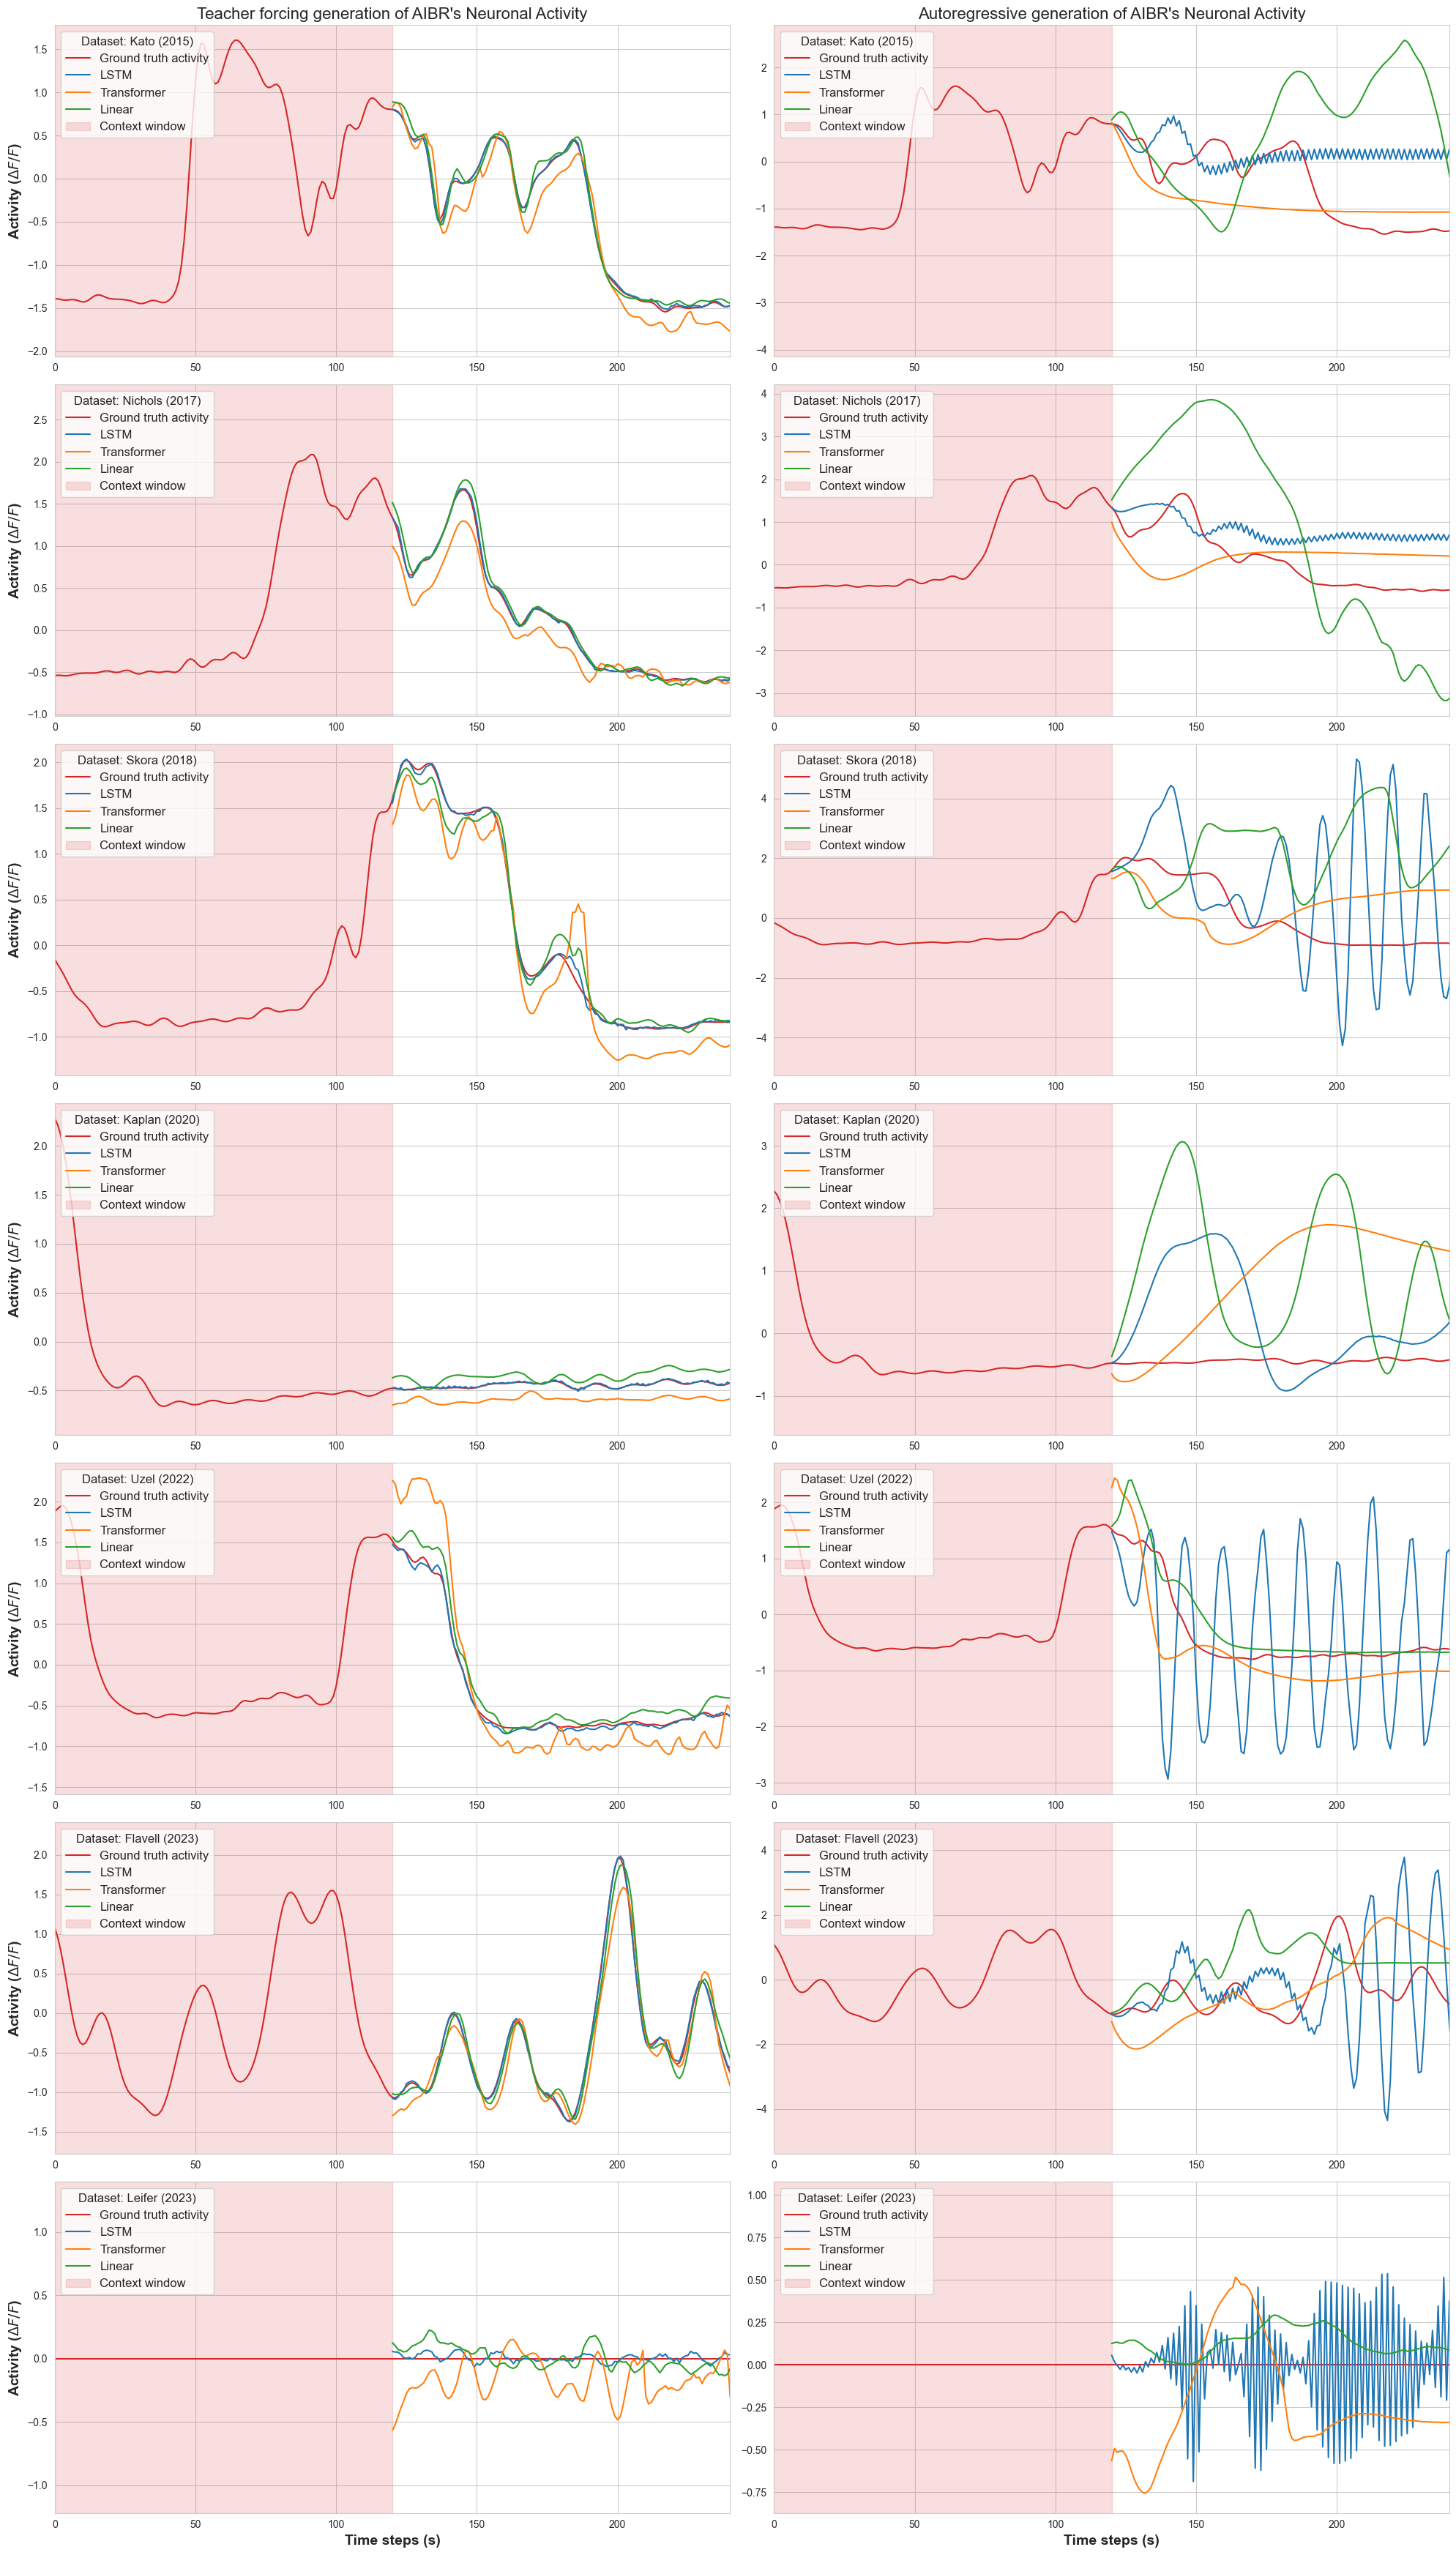

In [142]:
dataset_names = ['Kato2015', 'Nichols2017', 'Skora2018', 'Kaplan2020', 'Uzel2022', 'Flavell2023', 'Leifer2023']
ds_type = 'val'
models = ['LSTM', 'Transformer', 'Linear']
exp = 'exp5' # model trained with maximum amount of data
neuron_to_plot = 'AIBR'

fig, ax = plt.subplots(len(dataset_names), 2, figsize=(20, 5*len(dataset_names)))

row_mapping = {
    'Kato2015': 0,
    'Nichols2017': 1,
    'Skora2018': 2,
    'Kaplan2020': 3,
    'Uzel2022': 4,
    'Flavell2023': 5,
    'Leifer2023': 6,
}

for subplot_row, ds_name in enumerate(dataset_names):

    metadata_text = 'Dataset: {}'.format(ds_name[:-4]+' ('+ds_name[-4:]+')')

    gt_lstm = predictions_df.query(f'dataset_type == "{ds_type}" and dataset == "{ds_name}" and model == "LSTM" and exp == "{exp}" and Type == "Ground Truth"')[neuron_to_plot]
    gt_tr = predictions_df.query(f'dataset_type == "{ds_type}" and dataset == "{ds_name}" and model == "Transformer" and exp == "{exp}" and Type == "Ground Truth"')[neuron_to_plot]
    gt_lin = predictions_df.query(f'dataset_type == "{ds_type}" and dataset == "{ds_name}" and model == "Linear" and exp == "{exp}" and Type == "Ground Truth"')[neuron_to_plot]

    gt_gen_lstm = predictions_df.query(f'dataset_type == "{ds_type}" and dataset == "{ds_name}" and model == "LSTM" and exp == "{exp}" and Type == "GT Generation"')[neuron_to_plot]
    gt_gen_tr = predictions_df.query(f'dataset_type == "{ds_type}" and dataset == "{ds_name}" and model == "Transformer" and exp == "{exp}" and Type == "GT Generation"')[neuron_to_plot]
    gt_gen_lin = predictions_df.query(f'dataset_type == "{ds_type}" and dataset == "{ds_name}" and model == "Linear" and exp == "{exp}" and Type == "GT Generation"')[neuron_to_plot]

    ar_gen_lstm = predictions_df.query(f'dataset_type == "{ds_type}" and dataset == "{ds_name}" and model == "LSTM" and exp == "{exp}" and Type == "AR Generation"')[neuron_to_plot]
    ar_gen_tr = predictions_df.query(f'dataset_type == "{ds_type}" and dataset == "{ds_name}" and model == "Transformer" and exp == "{exp}" and Type == "AR Generation"')[neuron_to_plot]
    ar_gen_lin = predictions_df.query(f'dataset_type == "{ds_type}" and dataset == "{ds_name}" and model == "Linear" and exp == "{exp}" and Type == "AR Generation"')[neuron_to_plot]

    context_lstm = predictions_df.query(f'dataset_type == "{ds_type}" and dataset == "{ds_name}" and model == "LSTM" and exp == "{exp}" and Type == "Context"')[neuron_to_plot]
    context_tr = predictions_df.query(f'dataset_type == "{ds_type}" and dataset == "{ds_name}" and model == "Transformer" and exp == "{exp}" and Type == "Context"')[neuron_to_plot]
    context_lin = predictions_df.query(f'dataset_type == "{ds_type}" and dataset == "{ds_name}" and model == "Linear" and exp == "{exp}" and Type == "Context"')[neuron_to_plot]

    max_time_steps = len(context_lstm) + len(gt_lstm) - 1
    time_vector = np.arange(max_time_steps)

    # Teatcher focing plot
    ax[row_mapping[ds_name], 0].plot(time_vector[:len(context_lstm)], context_lstm, color='tab:red', label='Ground truth activity') # Plot context
    ax[row_mapping[ds_name], 0].plot(time_vector[len(context_lstm)-1:max_time_steps], gt_lstm, color='tab:red') # Plot ground truth
    ax[row_mapping[ds_name], 0].plot(time_vector[len(context_lstm)-1:max_time_steps], gt_gen_lstm, color=model_color_code['LSTM'], label='LSTM') # Plot ground truth generation
    ax[row_mapping[ds_name], 0].plot(time_vector[len(context_lstm)-1:max_time_steps], gt_gen_tr, color=model_color_code['Transformer'], label='Transformer') # Plot ground truth generation
    ax[row_mapping[ds_name], 0].plot(time_vector[len(context_lstm)-1:max_time_steps], gt_gen_lin, color=model_color_code['Linear'], label='Linear') # Plot ground truth generation
    
    # Autoregressive plot
    ax[row_mapping[ds_name], 1].plot(time_vector[:len(context_lstm)], context_lstm, color='tab:red', label='Ground truth activity') # Plot context
    ax[row_mapping[ds_name], 1].plot(time_vector[len(context_lstm)-1:max_time_steps], gt_lstm, color='tab:red') # Plot ground truth
    ax[row_mapping[ds_name], 1].plot(time_vector[len(context_lstm)-1:max_time_steps], ar_gen_lstm, color=model_color_code['LSTM'], label='LSTM') # Plot autoregressive generation
    ax[row_mapping[ds_name], 1].plot(time_vector[len(context_lstm)-1:max_time_steps], ar_gen_tr, color=model_color_code['Transformer'], label='Transformer') # Plot ground truth generation
    ax[row_mapping[ds_name], 1].plot(time_vector[len(context_lstm)-1:max_time_steps], ar_gen_lin, color=model_color_code['Linear'], label='Linear') # Plot ground truth generation

    # Fill context with tab:blue
    ax[row_mapping[ds_name], 0].axvspan(time_vector[0], time_vector[len(context_lstm)-1], alpha=0.15, color='tab:red', label='Context window')
    ax[row_mapping[ds_name], 1].axvspan(time_vector[0], time_vector[len(context_lstm)-1], alpha=0.15, color='tab:red', label='Context window')
    ax[row_mapping[ds_name], 0].set_ylabel('Activity ($\Delta F / F$)', fontsize=14, fontweight='bold')
    
    ax[row_mapping[ds_name], 0].legend(loc='upper left', title=metadata_text, fontsize=12, title_fontsize=12)
    ax[row_mapping[ds_name], 1].legend(loc='upper left', title=metadata_text, fontsize=12, title_fontsize=12)

    # Limit x-axis to 240
    ax[row_mapping[ds_name], 0].set_xlim([0, 240])
    ax[row_mapping[ds_name], 1].set_xlim([0, 240])

ax[-1, 0].set_xlabel('Time steps (s)', fontsize=14, fontweight='bold')
ax[-1, 1].set_xlabel('Time steps (s)', fontsize=14, fontweight='bold')

ax[0, 0].set_title(f"Teacher forcing generation of {neuron_to_plot}'s Neuronal Activity", fontsize=16)
ax[0, 1].set_title(f"Autoregressive generation of {neuron_to_plot}'s Neuronal Activity", fontsize=16)



plt.tight_layout()
plt.show()

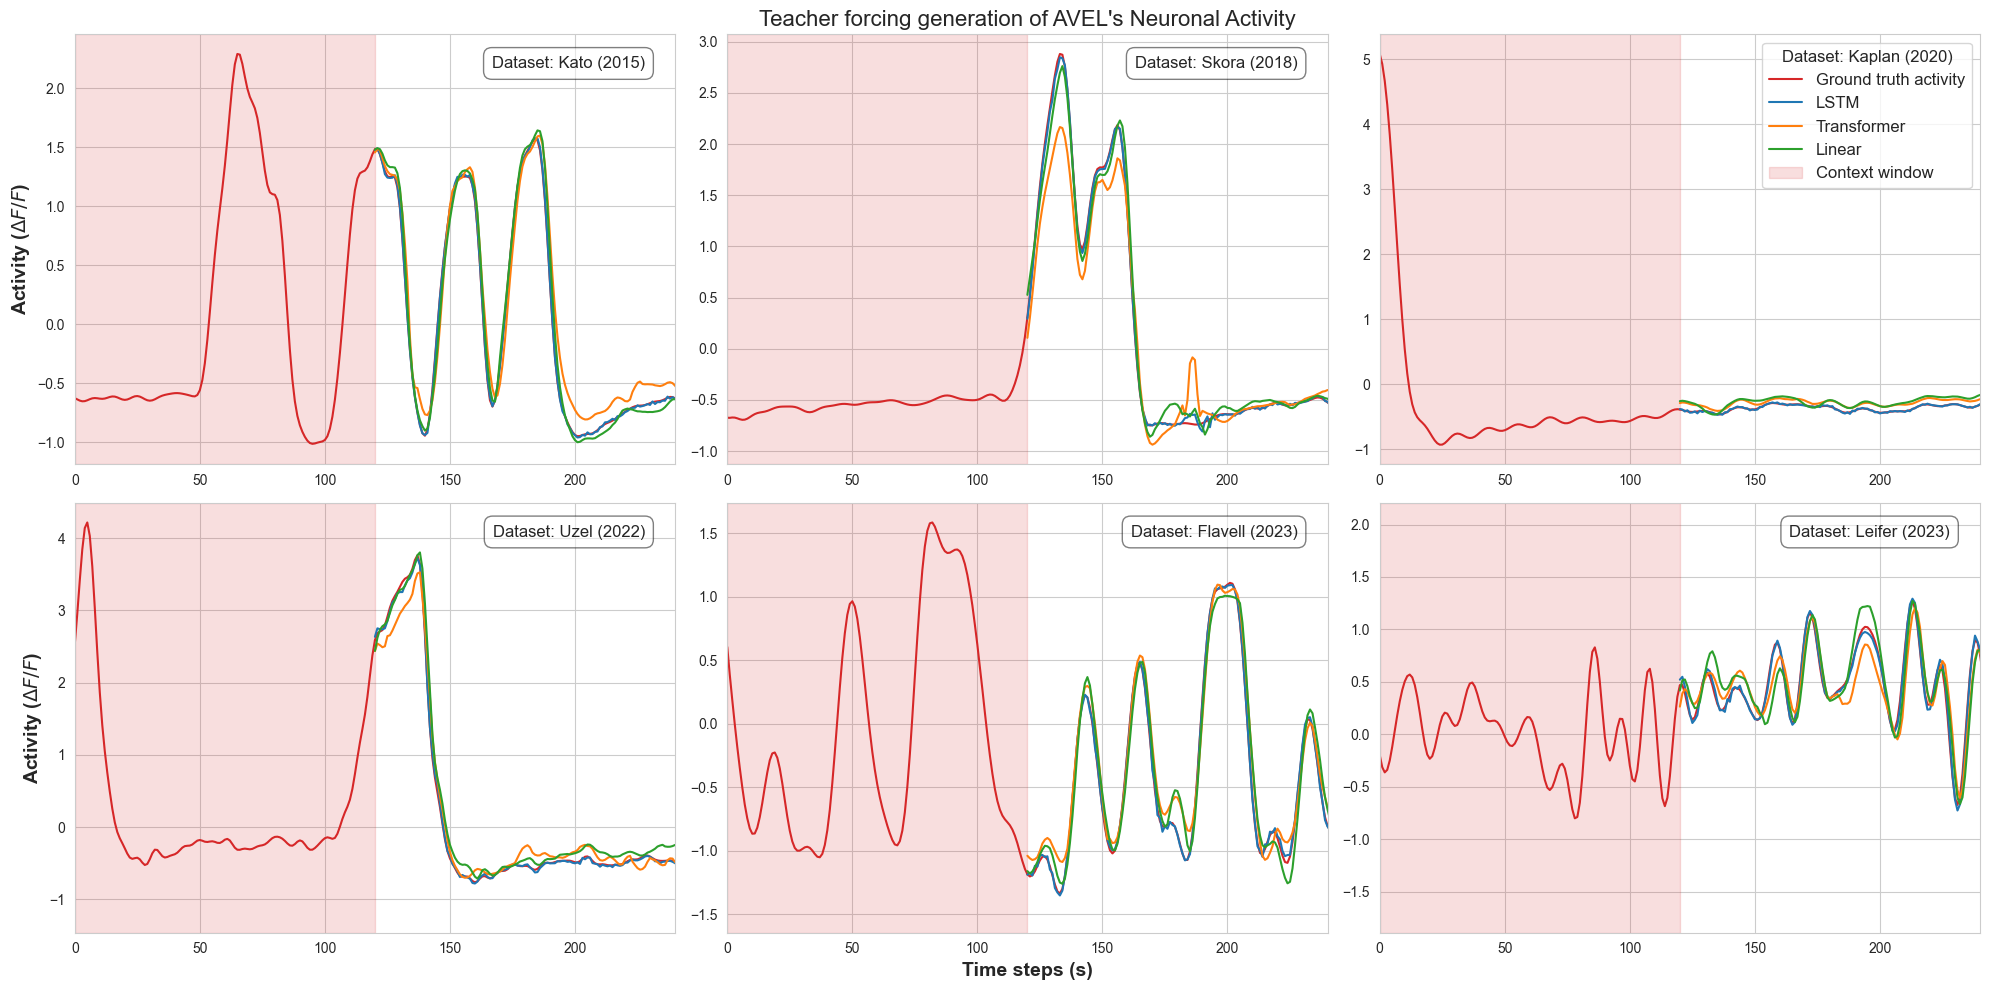

In [180]:
dataset_names = ['Kato2015', 'Skora2018', 'Kaplan2020', 'Uzel2022', 'Flavell2023', 'Leifer2023']
ds_type = 'val'
exp = 'exp5'  # model trained with maximum amount of data
neuron_to_plot = 'AVEL'

fig = plt.figure(figsize=(20, 5 * len(dataset_names)//3))  # Adjusted to account for 3 columns.

row_mapping = {
    'Kato2015': (0, 0),
    'Skora2018': (0, 1),
    'Kaplan2020': (0, 2),
    'Uzel2022': (1, 0),
    'Flavell2023': (1, 1),
    'Leifer2023': (1, 2),
}

for subplot_row, ds_name in enumerate(dataset_names):
    
    metadata_text = 'Dataset: {}'.format(ds_name[:-4]+' ('+ds_name[-4:]+')')

    gt_lstm = predictions_df.query(f'dataset_type == "{ds_type}" and dataset == "{ds_name}" and model == "LSTM" and exp == "{exp}" and Type == "Ground Truth"')[neuron_to_plot]
    gt_tr = predictions_df.query(f'dataset_type == "{ds_type}" and dataset == "{ds_name}" and model == "Transformer" and exp == "{exp}" and Type == "Ground Truth"')[neuron_to_plot]
    gt_lin = predictions_df.query(f'dataset_type == "{ds_type}" and dataset == "{ds_name}" and model == "Linear" and exp == "{exp}" and Type == "Ground Truth"')[neuron_to_plot]

    gt_gen_lstm = predictions_df.query(f'dataset_type == "{ds_type}" and dataset == "{ds_name}" and model == "LSTM" and exp == "{exp}" and Type == "GT Generation"')[neuron_to_plot]
    gt_gen_tr = predictions_df.query(f'dataset_type == "{ds_type}" and dataset == "{ds_name}" and model == "Transformer" and exp == "{exp}" and Type == "GT Generation"')[neuron_to_plot]
    gt_gen_lin = predictions_df.query(f'dataset_type == "{ds_type}" and dataset == "{ds_name}" and model == "Linear" and exp == "{exp}" and Type == "GT Generation"')[neuron_to_plot]

    ar_gen_lstm = predictions_df.query(f'dataset_type == "{ds_type}" and dataset == "{ds_name}" and model == "LSTM" and exp == "{exp}" and Type == "AR Generation"')[neuron_to_plot]
    ar_gen_tr = predictions_df.query(f'dataset_type == "{ds_type}" and dataset == "{ds_name}" and model == "Transformer" and exp == "{exp}" and Type == "AR Generation"')[neuron_to_plot]
    ar_gen_lin = predictions_df.query(f'dataset_type == "{ds_type}" and dataset == "{ds_name}" and model == "Linear" and exp == "{exp}" and Type == "AR Generation"')[neuron_to_plot]

    context_lstm = predictions_df.query(f'dataset_type == "{ds_type}" and dataset == "{ds_name}" and model == "LSTM" and exp == "{exp}" and Type == "Context"')[neuron_to_plot]
    context_tr = predictions_df.query(f'dataset_type == "{ds_type}" and dataset == "{ds_name}" and model == "Transformer" and exp == "{exp}" and Type == "Context"')[neuron_to_plot]
    context_lin = predictions_df.query(f'dataset_type == "{ds_type}" and dataset == "{ds_name}" and model == "Linear" and exp == "{exp}" and Type == "Context"')[neuron_to_plot]

    max_time_steps = len(context_lstm) + len(gt_lstm) - 1
    time_vector = np.arange(max_time_steps)
    
    # Get the corresponding row and col index for the subplot.
    row, col = row_mapping[ds_name]
    ax = plt.subplot2grid((len(dataset_names)//3, 3), (row, col))  # 3 columns subplot grid
    
    # Teacher forcing plot
    ax.plot(time_vector[:len(context_lstm)], context_lstm, color='tab:red', label='Ground truth activity')
    ax.plot(time_vector[len(context_lstm)-1:max_time_steps], gt_lstm, color='tab:red')
    ax.plot(time_vector[len(context_lstm)-1:max_time_steps], gt_gen_lstm, color=model_color_code['LSTM'], label='LSTM')
    ax.plot(time_vector[len(context_lstm)-1:max_time_steps], gt_gen_tr, color=model_color_code['Transformer'], label='Transformer')
    ax.plot(time_vector[len(context_lstm)-1:max_time_steps], gt_gen_lin, color=model_color_code['Linear'], label='Linear')
    
    ax.axvspan(time_vector[0], time_vector[len(context_lstm)-1], alpha=0.15, color='tab:red', label='Context window')
    ax.set_ylabel('Activity ($\Delta F / F$)', fontsize=14, fontweight='bold')
    ax.legend(loc='upper left', title=metadata_text, fontsize=12, title_fontsize=12)
    ax.set_xlim([0, 240])
    
    # Only set ylabel for the leftmost plots
    if col == 0:
        ax.set_ylabel('Activity ($\Delta F / F$)', fontsize=14, fontweight='bold')
    else:
        ax.set_ylabel('')
        
    # Only set xlabel for the bottom center plot
    if row == (len(dataset_names)//3 - 1) and col == 1:
        ax.set_xlabel('Time steps (s)', fontsize=14, fontweight='bold')
    
    # Only place the legend in the right-top plot
    if row == 0 and col == 2:
        ax.legend(loc='upper right', title=metadata_text, fontsize=12, title_fontsize=12)
    else:
        ax.legend().remove()
        # Add a text box with the dataset metadata
        ax.text(0.95, 0.95, metadata_text,
                transform=ax.transAxes,
                fontsize=12,
                verticalalignment='top',
                horizontalalignment='right',
                bbox=dict(boxstyle='round, pad=0.5', facecolor='white', edgecolor='black', alpha=0.5)
                )
        
    # Set title for the middle plot of the first row, if needed.
    if row == 0 and col == 1: 
        ax.set_title(f"Teacher forcing generation of {neuron_to_plot}'s Neuronal Activity", fontsize=16)
        
plt.tight_layout()
plt.show()

# Figure 3

In [42]:
experiments_to_plot = [
    '/home/lrvnc/Projects/worm-graph/logs/results/ICLR/CROSS_DS_LSTM',
    '/home/lrvnc/Projects/worm-graph/logs/results/ICLR/CROSS_DS_LINEAR',
    '/home/lrvnc/Projects/worm-graph/logs/results/ICLR/CROSS_DS_TRANSFORMER'
]

model = [
    'LSTM',
    'Linear',
    'Transformer'
]

analysis_df = pd.DataFrame(columns=['exp', 'model', 'train_dataset', 'val_dataset', 'val_loss', 'val_baseline'])

for log_dir, model in zip(experiments_to_plot, model):

    for exp_dir in np.sort(os.listdir(log_dir)):

        # Skip if not starts with exp
        if not exp_dir.startswith('exp') or exp_dir.startswith('exp_'):
            continue

        val_url = os.path.join(log_dir, exp_dir, 'analysis', 'validation_loss_per_dataset.csv')
        train_ds_url = os.path.join(log_dir, exp_dir, 'dataset', 'train_dataset_info.csv')
        
        val_df = pd.read_csv(val_url)
        val_df['exp'] = exp_dir
        val_df['model'] = model

        train_dataset_info = pd.read_csv(train_ds_url)
        val_df['train_dataset'] = train_dataset_info['dataset'].unique()[0]

        # Change 'dataset' column name to 'val_dataset'
        val_df = val_df.rename(columns={'dataset': 'val_dataset'})

        # Swap uzel and kaplan
        val_df = val_df.iloc[[0, 1, 2, 4, 3, 5, 6], :]
        val_df = val_df.reset_index(drop=True)

        analysis_df = pd.concat([analysis_df, val_df], axis=0)

In [43]:
def swap_rows(df_subset):
    dfs = []
    for model in ['LSTM', 'Linear', 'Transformer']:
        model_subset = df_subset[df_subset['model'] == model]
        # Reset index
        model_subset = model_subset.reset_index(drop=True)
        # Swap uzel and kaplan
        model_subset = model_subset.iloc[[0, 1, 2, 4, 3, 5, 6], :]
        # Reset index
        model_subset = model_subset.reset_index(drop=True)
        dfs.append(model_subset)
    # Concatenate all dataframes
    df_subset = pd.concat(dfs, axis=0)
    return df_subset

In [44]:
# Swap last two colors of marker_colors
marker_colors[-1], marker_colors[-2] = marker_colors[-2], marker_colors[-1]

In [45]:
# Copy marker colors
marker_colors_copy = marker_colors
marker_colors_copy[-1], marker_colors_copy[-2] = marker_colors[-2], marker_colors[-1]

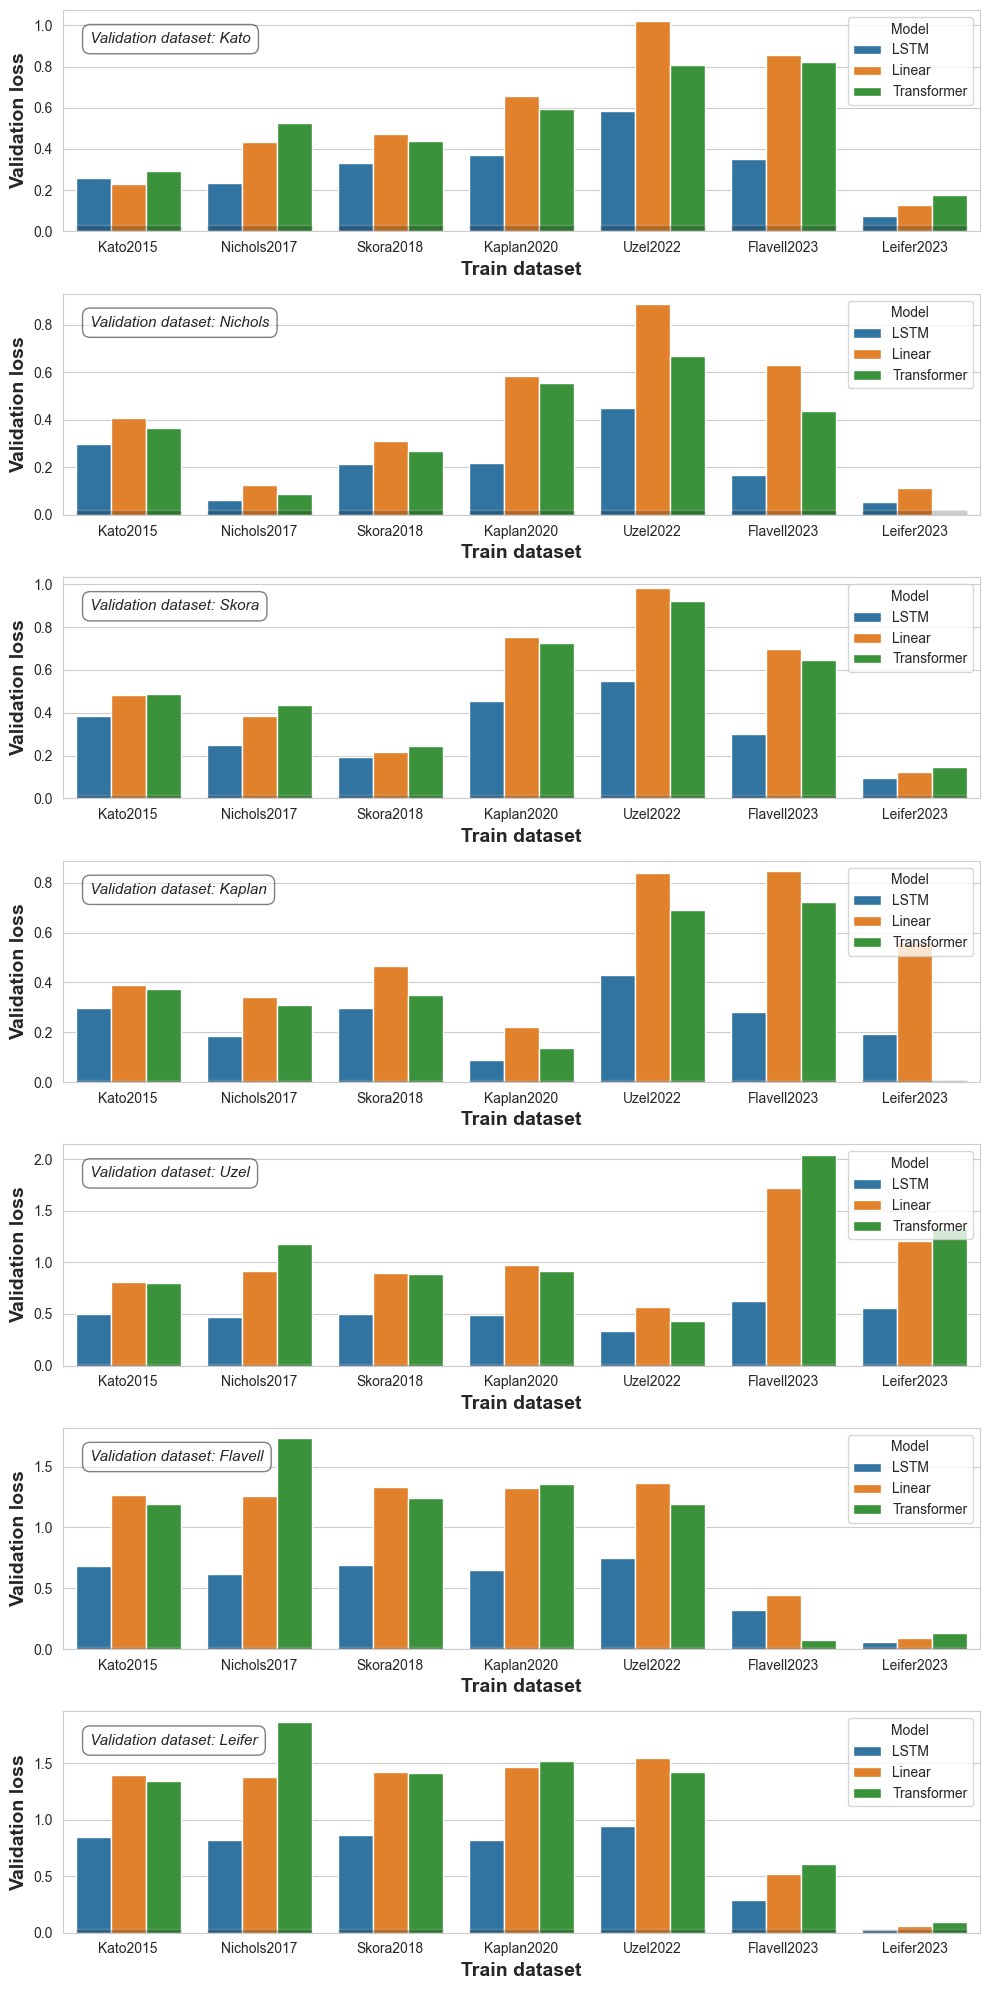

In [46]:
val_ds_names = analysis_df['val_dataset'].unique()

fig, ax = plt.subplots(7, 1, figsize=(10, 20))

for i, val_ds_name in enumerate(val_ds_names):
    
    df_subset = analysis_df[analysis_df['val_dataset'] == val_ds_name]
    df_subset = swap_rows(df_subset)

    sns.barplot(data=df_subset, x='train_dataset', y='val_loss', hue='model', ax=ax[i], palette=marker_colors_copy)
    sns.barplot(data=df_subset, x='train_dataset', y='val_baseline', color='black', alpha=0.2, ax=ax[i])
    ax[i].set_ylabel('Validation loss', fontsize=14, fontweight='bold')
    ax[i].legend(loc='upper right', title='Model')
    
    # Delete x label
    ax[i].set_xlabel('')

    # Add text box in upper left corner with validation dataset name
    ax[i].text(0.03, 0.90, 'Validation dataset: {}'.format(val_ds_name[:-4]),
        transform=ax[i].transAxes,
        fontsize=11,
        fontstyle='italic',
        verticalalignment='top',
        bbox=dict(boxstyle='round, pad=0.5', facecolor='white', edgecolor='black', alpha=0.5)
    )

    ax[i].set_xlabel('Train dataset', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

/tmp/ipykernel_18924/2398266743.py:46: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(pad=0.1, w_pad=0.5)


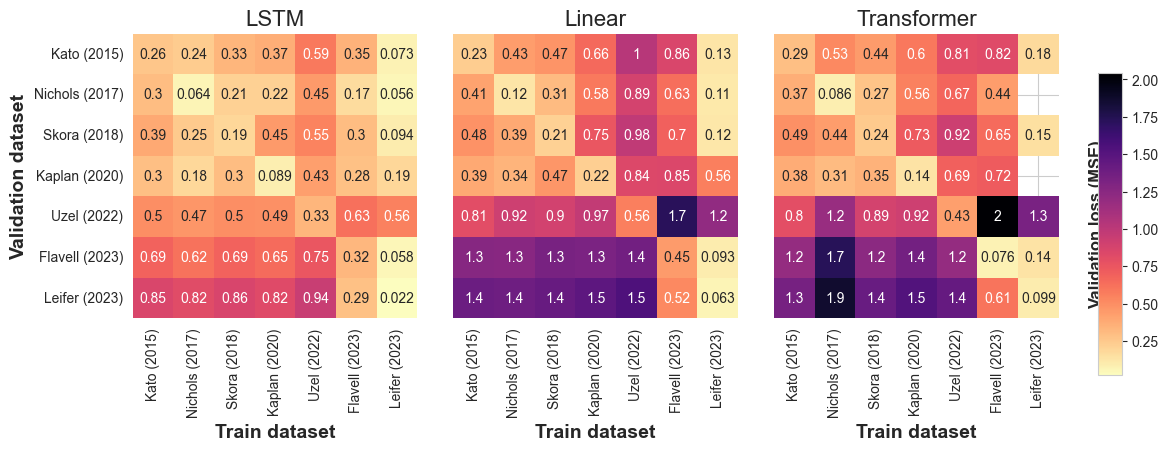

In [48]:
train_ds_names = ['Kato2015', 'Nichols2017', 'Skora2018', 'Kaplan2020', 'Uzel2022', 'Flavell2023', 'Leifer2023']
val_ds_names = analysis_df['val_dataset'].unique()
models = analysis_df['model'].unique()

# Figure size
fig, ax = plt.subplots(1, len(models), figsize=(12, 4), sharex='col', sharey='row')

# Initialize vmin and vmax for the color scale
vmin = analysis_df['val_loss'].min()
vmax = analysis_df['val_loss'].max()

for i, model_name in enumerate(models):
    
    # Filter data for the specific model
    df_model_subset = analysis_df[analysis_df['model'] == model_name]
    
    # Create an empty matrix for the heatmap data
    heatmap_data = pd.DataFrame(columns=train_ds_names, index=val_ds_names)
    
    for train_ds in train_ds_names:
        for val_ds in val_ds_names:
            value = df_model_subset[(df_model_subset['train_dataset'] == train_ds) & 
                                    (df_model_subset['val_dataset'] == val_ds)]['val_loss'].values
            if value:
                heatmap_data.at[val_ds, train_ds] = value[0]
    
    # Plot the heatmap
    sns.heatmap(heatmap_data.astype(float), cmap="magma_r", ax=ax[i], annot=True, square=True,
                cbar=False, vmin=vmin, vmax=vmax)
    ax[i].set_title('{}'.format(model_name), fontsize=16)
    # Set xlabel
    ax[i].set_xlabel('Train dataset', fontsize=14, fontweight='bold')
    ax[i].set_xticklabels(dataset_labels[:-1], rotation=90, fontsize=10)
    # Set ylabel
    ax[0].set_ylabel('Validation dataset', fontsize=14, fontweight='bold')
    ax[i].set_yticklabels(dataset_labels[:-1], rotation=0, fontsize=10)
    # Set xticks

# Add a single colorbar at the rightmost part
cbar_ax = fig.add_axes([0.92, 0.125, 0.02, 0.755])  # [left, bottom, width, height] of the colorbar axes in figure coordinates.
fig.colorbar(ax[-1].collections[0], cax=cbar_ax)  # ax[-1].collections[0] grabs the colormap of the last subplot

# Add title to cmap
cbar_ax.set_ylabel('Validation loss (MSE)', fontsize=12, fontweight='bold', rotation=90, labelpad=-50)

plt.tight_layout(pad=0.1, w_pad=0.5)
plt.subplots_adjust(right=0.9)  # adjust the rightmost part to make room for the colorbar
plt.show()

# Model Parameters

In [5]:
from prettytable import PrettyTable

def print_parameters(model):
    table = PrettyTable(["Module", "Parameters", "Trainable"])

    total_params = 0
    total_trainable = 0

    for name, parameter in model.named_parameters():
        num_params = torch.prod(torch.tensor(parameter.size())).item()
        total_params += num_params

        trainable = parameter.requires_grad
        if trainable:
            total_trainable += num_params

        table.add_row([name, num_params, trainable])

    print(table)
    print("Total Parameters:", total_params)
    print("Total Trainable Parameters:", total_trainable)

In [6]:
from models._main import get_model
from omegaconf import OmegaConf

model_config = OmegaConf.load('/home/lrvnc/Projects/worm-graph/configs/submodule/model.yaml')

In [8]:
model_config

{'model': {'type': 'NeuralTransformer', 'input_size': 302, 'hidden_size': 312, 'num_layers': 1, 'loss': 'MSE', 'fft_reg_param': 0.0, 'l1_reg_param': 0.0, 'use_this_pretrained_model': None}}

In [9]:
# Linear
model_config.model.use_this_pretrained_model = None
model = get_model(model_config.model)
print_parameters(model)

+-------------------------------------------+------------+-----------+
|                   Module                  | Parameters | Trainable |
+-------------------------------------------+------------+-----------+
|           input_hidden.1.weight           |   94224    |    True   |
|            input_hidden.1.bias            |    312     |    True   |
|  hidden_hidden.0.0.sa.heads.0.key.weight  |   24336    |    True   |
| hidden_hidden.0.0.sa.heads.0.query.weight |   24336    |    True   |
| hidden_hidden.0.0.sa.heads.0.value.weight |   24336    |    True   |
|  hidden_hidden.0.0.sa.heads.1.key.weight  |   24336    |    True   |
| hidden_hidden.0.0.sa.heads.1.query.weight |   24336    |    True   |
| hidden_hidden.0.0.sa.heads.1.value.weight |   24336    |    True   |
|  hidden_hidden.0.0.sa.heads.2.key.weight  |   24336    |    True   |
| hidden_hidden.0.0.sa.heads.2.query.weight |   24336    |    True   |
| hidden_hidden.0.0.sa.heads.2.value.weight |   24336    |    True   |
|  hid